Thomas Conibear - Homework on Kneighbor Algorithm

I browsed the UC Irvine website and looked at dozens of datasets, finding many that would be good to analyze. However, almost all of them would consistently give me an error that it could not convert the string to float after I imported all the data and set up the arrays. I troubleshot this online and all solutions pointed to using np.astype but it would not work on almost all the datasets I tried to use. I attempted other methods like manipulating the arrays or other numpy methods found online but still could not get the strings in the array to convert to floats/integers. I kept an example of a dataset that I encountered the error at the bottom.

Luckily, it worked with this wine dataset found near the bottom of the UC Irvine dataset directory. I then roughly followed the lecture notes to classify it like the homework asked. 

In [161]:
#Thomas Conibear - Homework on Kneighbor Algorithm 

#Homework says to choose a dataset from online UC Irvine website and apply Kneighbor Algorithm to classify it

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', delimiter=';')
data

,"1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065"
0,"1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4..."
1,"1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5...."
2,"1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7..."
3,"1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.3..."
4,"1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6..."
5,"1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.2..."
6,"1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5..."
7,"1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,..."
8,"1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.2..."
9,"1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75..."


In [122]:
data2 = np.asarray(data)
data2

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [184]:
X = test_inputs[:,1:14] #data 
Y = test_inputs[:,0] #target

In [185]:
#This is the important part I could only get to work on this dataset. 
Y=Y.astype(float)

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [187]:
len(X)

177

In [188]:
len(X_train)

132

In [189]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [192]:
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 64.4%


In [193]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 67.9%


In [194]:
import warnings
warnings.filterwarnings('ignore')

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [197]:
avg_scores

[0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225,
 0.678673939866225]

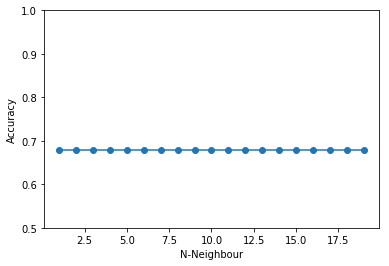

In [196]:
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0.5,1.0])

plt.show()

In [164]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

data3 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data', delimiter=';')
data3

,"1,1,1,13,2,4,2,3,1,12,0"
0,"3,12,3,2,3,11,4,5,2,5,1"
1,"1,9,4,6,1,4,3,2,3,9,1"
2,"1,4,3,13,2,13,2,1,3,6,1"
3,"3,10,2,7,1,2,2,11,4,9,0"
4,"1,3,4,5,3,4,1,12,4,6,0"
5,"2,6,4,11,2,3,4,9,1,7,0"
6,"3,2,4,9,3,7,4,3,4,5,0"
7,"4,4,3,13,1,8,3,9,3,10,0"
8,"1,9,3,8,4,4,1,7,3,5,0"
9,"4,7,3,12,1,13,1,9,2,6,0"


In [172]:
data4 = np.asarray(data3)
data4

array([['3,12,3,2,3,11,4,5,2,5,1'],
       ['1,9,4,6,1,4,3,2,3,9,1'],
       ['1,4,3,13,2,13,2,1,3,6,1'],
       ...,
       ['1,11,4,7,3,9,1,13,2,7,1'],
       ['3,11,1,8,1,1,3,13,2,8,1'],
       ['2,5,2,9,4,9,2,3,3,3,2']], dtype=object)

In [173]:
X3 = data4[:,1:10] #data 
Y3 = data4[:,0] #target

In [198]:
#Got error could not convert string to float so made sure to convert everything to float
Y3=Y3.astype(float)

ValueError: could not convert string to float: '3,12,3,2,3,11,4,5,2,5,1'

This dataset and many others like it would not convert the strings to floats for some reason. I am not sure if it is my code using wrong indexes or something like that but I could not get through this problem despite using multiple methods found online.